In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

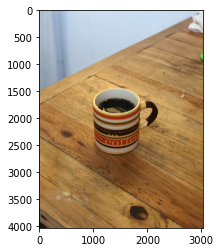

In [6]:
img = cv2.cvtColor(cv2.imread('taza.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [7]:
img.shape

(4032, 3024, 3)

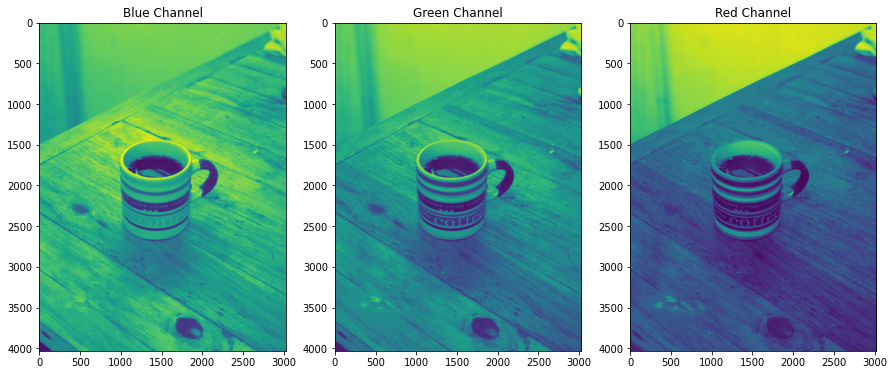

In [8]:
blue,green,red = cv2.split(img)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [5]:
blue_temp_df = pd.DataFrame( data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023
0,185,186,184,183,183,182,182,183,183,182,...,223,225,226,226,225,225,226,226,226,225
1,185,186,184,183,183,182,182,183,183,182,...,224,226,226,226,225,225,226,226,226,225
2,185,186,184,183,183,182,182,183,183,182,...,225,227,226,226,225,225,226,226,226,225
3,185,186,184,183,183,182,182,183,183,182,...,226,227,226,226,225,225,226,226,226,225
4,185,186,184,183,183,182,182,183,183,182,...,227,227,226,226,225,225,226,226,226,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,18,18,16,16,17,18,19,20,16,16,...,124,122,126,121,118,116,117,115,116,117
4028,19,18,17,16,15,16,17,19,14,16,...,119,117,122,120,121,119,117,115,120,124
4029,20,19,17,16,14,15,17,18,14,16,...,119,117,116,118,120,120,117,117,123,130
4030,21,19,17,16,16,18,19,20,16,17,...,119,118,114,114,116,117,117,118,124,131


In [6]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [7]:
pca_b = PCA(n_components = 50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components = 50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components = 50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)



In [8]:
print(trans_pca_b.shape)
print(trans_pca_g.shape)
print(trans_pca_r.shape)

(4032, 50)
(4032, 50)
(4032, 50)


In [9]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)

In [10]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

In [12]:
print(img_reduced.shape)

(4032, 3024, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


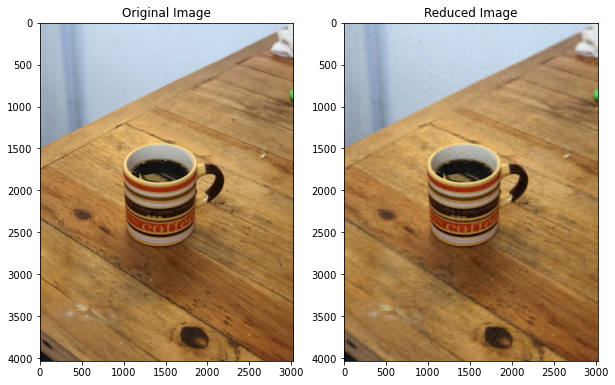

In [24]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


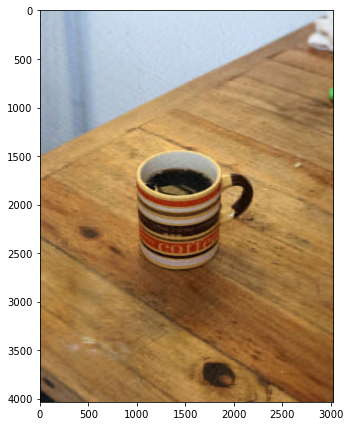

In [42]:

blue,green,red = cv2.split(img)
DF_blue = blue/255
DF_green = green /255
DF_red = red/255

pca = PCA(n_components = 50)
trans_pca_b = pca.fit_transform(DF_blue)

pca1 = PCA(n_components = 50)
trans_pca_g = pca1.fit_transform(DF_green)

pca2 = PCA(n_components = 50)
trans_pca_r = pca2.fit_transform(DF_red)

rgb = [trans_pca_b,trans_pca_g,trans_pca_r,pca,pca1,pca2]
invb = rgb[3].inverse_transform(rgb[0])
invg = rgb[4].inverse_transform(rgb[1])
invr = rgb[5].inverse_transform(rgb[2])

img2 = cv2.merge((invb, invg, invr))

fig = plt.figure(figsize = (10,7.2))
plt.imshow(img2)